In [1]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/screener_sbanalysis_api/"
]

In [2]:
sys.path += paths


In [3]:
# !pip install elasticsearch-dsl

In [4]:
# !pip install psycopg2-binary

In [5]:

from pandas.io import sql as psql

In [6]:
from lib.static_db import PgsqlExecutor

In [7]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [8]:
db = PgsqlExecutor(research_db)

In [9]:
sql = """

select * from model.dcf_values order by symbol, fiscal_year, created desc
"""
data = db.get_dataframe(sql)
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  \
0               0.095               -5.720       2000.0          2.0   
1               0.095               -3.896       2001.0          3.0   
2               0.095               -3.106       2002.0          4.0   
3               0.095               -2.106       2003.0          5.0   
4               0.095               -0.897       2004.0          5.0   

   market_dcf  dcf                                              error  \
0        54.7  0.0  missing cash_interest_paid: single positional ...   
1        21.8  0.0                                                      
2        16.9  0.0                                                      
3        29.9  0.0                                                      
4        23.9  0.1                                                      

                     created  
0 2020-06-10 14:05:15.490086  
1 2020-06-10 15:40:51.179175  
2 2020-06-10 17:19:06.127681  
3 2020-06-11 00:36:23.941796  
4 2020-06-11 00:38:43.937018

In [10]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [11]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1)
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)


In [12]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  \
0               0.095               -5.720       2000.0          2.0   
1               0.095               -3.896       2001.0          3.0   
2               0.095               -3.106       2002.0          4.0   
3               0.095               -2.106       2003.0          5.0   
4               0.095               -0.897       2004.0          5.0   

   market_dcf  dcf                                              error  \
0        54.7  0.0  missing cash_interest_paid: single positional ...   
1        21.8  0.0                                                      
2        16.9  0.0                                                      
3        29.9  0.0                                                      
4        23.9  0.1                                                      

                     created last_symbol  last_price  last_growth_rate  \
0 2020-06-10 14:05:15.490086         NaN         NaN               NaN   
1 2020-06-10 15:40:51.179175           A    54.75000            -5.720   
2 2020-06-10 17:19:06.127681           A    28.50999            -3.896   
3 2020-06-11 00:36:23.941796           A    17.96000            -3.106   
4 2020-06-11 00:38:43.937018           A    29.24000            -2.106   

   last_fiscal_year  last_market_dcf  last_dcf  
0               NaN              NaN       NaN  
1            2000.0             54.7       0.0  
2            2001.0             21.8       0.0  
3            2002.0             16.9       0.0  
4            2003.0             29.9       0.0

In [13]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]





In [14]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  ...  \
0               0.095               -5.720       2000.0          2.0  ...   
1               0.095               -3.896       2001.0          3.0  ...   
2               0.095               -3.106       2002.0          4.0  ...   
3               0.095               -2.106       2003.0          5.0  ...   
4               0.095               -0.897       2004.0          5.0  ...   

   last_dcf  price_change direction correct fiscal_change  growth_changes  \
0       NaN           NaN        -1   False           NaN             NaN   
1       0.0     -26.24001        -1    True           1.0           1.824   
2       0.0     -10.54999        -1    True           1.0           0.790   
3       0.0      11.28000         1    True           1.0           1.000   
4       0.0      -5.14000        -1    True           1.0           1.209   

   market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
0                NaN         NaN           NaN                  NaN  
1         -60.091324    0.000000        -100.0            -0.091324  
2         -17.186958    0.000000        -100.0           -23.535575  
3          72.383073    0.000000        -100.0            -5.902004  
4         -20.519836    0.341997        -100.0             2.257182  

[5 rows x 29 columns]

In [15]:
new_data = data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)&(data["total_years"] == 5)]

In [16]:
print (new_data.shape)
new_data.head()

(26067, 29)


id symbol exchangesymbol  tradingitemid  is_active  current_price  \
3  179418      A           NYSE        2587460          1          29.24   
4  179857      A           NYSE        2587460          1          24.10   
5   89109      A           NYSE        2587460          1          33.29   
6  115325      A           NYSE        2587460          1          34.85   
7  141405      A           NYSE        2587460          1          36.74   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  ...  \
3               0.095               -2.106       2003.0          5.0  ...   
4               0.095               -0.897       2004.0          5.0  ...   
5               0.095                1.576       2005.0          5.0  ...   
6               0.095                1.925       2006.0          5.0  ...   
7               0.095                1.718       2007.0          5.0  ...   

   last_dcf  price_change direction correct fiscal_change  growth_changes  \
3       0.0         11.28         1    True           1.0           1.000   
4       0.0         -5.14        -1    True           1.0           1.209   
5       0.1          9.19         1    True           1.0           2.473   
6     165.1          1.56         1    True           1.0           0.349   
7     338.1          1.89         1    True           1.0          -0.207   

   market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
3          72.383073    0.000000   -100.000000            -5.902004  
4         -20.519836    0.341997   -100.000000             2.257182  
5          31.120332  684.647303    -99.585062            -0.829876  
6          21.628117  519.675578    395.944728            -5.677381  
7          17.503587  -50.215208    870.157819            10.760402  

[5 rows x 29 columns]

In [17]:
new_data =new_data.loc[:, ["symbol", "current_price","last_price", "last_growth_rate","current_growth_rate", "market_dcf", "dcf", "growth_changes",
                          "market_dcf_change", "dcf_change", "last_fiscal_year", "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price","price_change", 
                           "direction"]].iloc[1:, :]

In [18]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]


In [19]:
new_data.head()

symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
4      A          24.10       29.24            -2.106               -0.897   
5      A          33.29       24.10            -0.897                1.576   
6      A          34.85       33.29             1.576                1.925   
7      A          36.74       34.85             1.925                1.718   
8      A          15.63       36.74             1.718                1.874   

   market_dcf    dcf  growth_changes  market_dcf_change  dcf_change  \
4        23.9    0.1           1.209         -20.519836    0.341997   
5        31.4  165.1           2.473          31.120332  684.647303   
6        38.6  338.1           0.349          21.628117  519.675578   
7        44.7  320.6          -0.207          17.503587  -50.215208   
8        26.2  431.9           0.156         -50.353838  302.939575   

   last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
4            2003.0             29.9       0.0   -100.000000   
5            2004.0             23.9       0.1    -99.585062   
6            2005.0             31.4     165.1    395.944728   
7            2006.0             38.6     338.1    870.157819   
8            2007.0             44.7     320.6    772.618400   

   market_dcf_to_price  price_change  direction  price_change_perf  
4             2.257182         -5.14         -1         -17.578659  
5            -0.829876          9.19          1          38.132780  
6            -5.677381          1.56          1           4.686092  
7            10.760402          1.89          1           5.423242  
8            21.665759        -21.11         -1         -57.457812

In [20]:
# new_data = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [21]:
new_data[new_data["direction"] ==1]["dcf_to_price"].describe()

count    1.360400e+04
mean              NaN
std               NaN
min              -inf
25%     -1.000000e+02
50%      1.398772e+00
75%      1.538959e+02
max               inf
Name: dcf_to_price, dtype: float64

In [22]:
dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["dcf_to_price"] > -110)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

(array([ 155., 4208.,  133.,   63.,   48.,   37.,   28.,   28.,   33.,
          33.,   31.,   23.,   42.,   69.,  110.,  227.,  247.,  270.,
         282.,  313.,  248.,  214.,  200.,  188.,  161.,  173.,  123.,
         147.,  109.,   86.,  103.,   66.,   93.,   72.,   60.,   51.,
          50.,   50.,   49.,   42.]),
 array([-109.95024876, -102.20329499,  -94.45634122,  -86.70938745,
         -78.96243369,  -71.21547992,  -63.46852615,  -55.72157238,
         -47.97461862,  -40.22766485,  -32.48071108,  -24.73375731,
         -16.98680355,   -9.23984978,   -1.49289601,    6.25405776,
          14.00101152,   21.74796529,   29.49491906,   37.24187283,
          44.9888266 ,   52.73578036,   60.48273413,   68.2296879 ,
          75.97664167,   83.72359543,   91.4705492 ,   99.21750297,
         106.96445674,  114.7114105 ,  122.45836427,  130.20531804,
         137.95227181,  145.69922557,  153.44617934,  161.19313311,
         168.94008688,  176.68704064,  184.43399441,  192.18094818

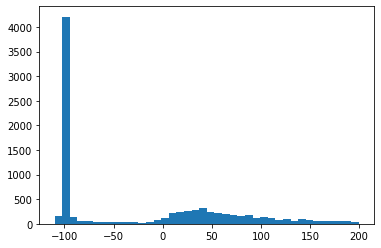

In [23]:
import matplotlib.pyplot as plt

plt.hist(dcf_to_price, bins=40)

In [24]:
new_data[new_data["direction"] == 1]["market_dcf_to_price"].describe()

count    1.360400e+04
mean              inf
std               NaN
min     -1.656799e+16
25%      1.437509e+00
50%      3.743286e+01
75%      1.035165e+02
max               inf
Name: market_dcf_to_price, dtype: float64

In [25]:
market_dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

(array([ 23.,  12.,  16.,   9.,  21.,  26.,  24.,  27.,  33.,  92.,  19.,
         18.,  27.,  32.,  28.,  50.,  69., 122., 231., 593., 892., 996.,
        922., 895., 718., 633., 487., 459., 389., 315., 250., 196., 158.,
        135., 120.,  88.,  85.,  75.,  79.,  60.]),
 array([-196.90721649, -186.98664223, -177.06606797, -167.14549371,
        -157.22491945, -147.30434518, -137.38377092, -127.46319666,
        -117.5426224 , -107.62204813,  -97.70147387,  -87.78089961,
         -77.86032535,  -67.93975108,  -58.01917682,  -48.09860256,
         -38.1780283 ,  -28.25745403,  -18.33687977,   -8.41630551,
           1.50426875,   11.42484302,   21.34541728,   31.26599154,
          41.1865658 ,   51.10714007,   61.02771433,   70.94828859,
          80.86886285,   90.78943712,  100.71001138,  110.63058564,
         120.5511599 ,  130.47173416,  140.39230843,  150.31288269,
         160.23345695,  170.15403121,  180.07460548,  189.99517974,
         199.915754  ]),
 <a list of 40 Patch 

In [26]:
new_data[new_data["direction"] == 1]["last_growth_rate"].describe()

count    13970.000000
mean        -0.816046
std         97.491607
min      -9723.113000
25%         -1.120000
50%          0.047000
75%          0.517000
max       2796.298000
Name: last_growth_rate, dtype: float64

In [27]:
last_growth_rate = new_data[(new_data["direction"] == 1) 
                        & (new_data["last_growth_rate"] > -0.88)
                        & (new_data["last_growth_rate"] < 0.65)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

In [28]:
plt.hist(last_growth_rate, bins=40)

(array([ 76.,  79.,  73.,  69.,  73.,  71.,  88.,  64.,  84.,  84.,  84.,
         84.,  90.,  75.,  95.,  92., 115., 126., 131., 166., 181., 233.,
        310., 380., 414., 506., 365., 349., 326., 320., 258., 226., 206.,
        209., 170., 167., 158., 139., 105., 122.]),
 array([-0.879   , -0.840825, -0.80265 , -0.764475, -0.7263  , -0.688125,
        -0.64995 , -0.611775, -0.5736  , -0.535425, -0.49725 , -0.459075,
        -0.4209  , -0.382725, -0.34455 , -0.306375, -0.2682  , -0.230025,
        -0.19185 , -0.153675, -0.1155  , -0.077325, -0.03915 , -0.000975,
         0.0372  ,  0.075375,  0.11355 ,  0.151725,  0.1899  ,  0.228075,
         0.26625 ,  0.304425,  0.3426  ,  0.380775,  0.41895 ,  0.457125,
         0.4953  ,  0.533475,  0.57165 ,  0.609825,  0.648   ]),
 <a list of 40 Patch objects>)

In [29]:
new_data[new_data["direction"] == -1]["dcf_to_price"].describe()

count    1.138700e+04
mean    -1.571276e+14
std      1.135358e+16
min     -9.940691e+17
25%     -1.000000e+02
50%     -1.000000e+02
75%      1.302447e+02
max      1.109842e+15
Name: dcf_to_price, dtype: float64

(array([  20.,   18.,   15.,   21.,   33.,   24.,   40.,   50.,   79.,
        3646.,  428.,   86.,   67.,   38.,   31.,   38.,   37.,   43.,
          46.,   57.,  129.,  199.,  241.,  216.,  198.,  165.,  175.,
         146.,  134.,   88.,   94.,   89.,   78.,   66.,   56.,   48.,
          40.,   40.,   42.,   39.]),
 array([-1.99806047e+02, -1.89823632e+02, -1.79841217e+02, -1.69858803e+02,
        -1.59876388e+02, -1.49893973e+02, -1.39911559e+02, -1.29929144e+02,
        -1.19946730e+02, -1.09964315e+02, -9.99819003e+01, -8.99994857e+01,
        -8.00170710e+01, -7.00346564e+01, -6.00522418e+01, -5.00698272e+01,
        -4.00874125e+01, -3.01049979e+01, -2.01225833e+01, -1.01401686e+01,
        -1.57754013e-01,  9.82466062e+00,  1.98070752e+01,  2.97894899e+01,
         3.97719045e+01,  4.97543191e+01,  5.97367338e+01,  6.97191484e+01,
         7.97015630e+01,  8.96839777e+01,  9.96663923e+01,  1.09648807e+02,
         1.19631222e+02,  1.29613636e+02,  1.39596051e+02,  1.49578465

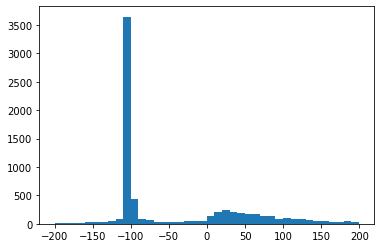

In [30]:
dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["dcf_to_price"] > -200)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

plt.hist(dcf_to_price, bins=40)

In [31]:
new_data[new_data["direction"] == -1]["market_dcf_to_price"].describe()

count    1.138800e+04
mean              inf
std               NaN
min     -1.730733e+09
25%     -1.000000e+02
50%      2.523583e+01
75%      1.077732e+02
max               inf
Name: market_dcf_to_price, dtype: float64

(array([ 31.,  22.,  14.,  23.,  20.,  25.,  27.,  47.,  39., 125.,  24.,
         25.,  23.,  21.,  23.,  43.,  66., 102., 207., 502., 769., 700.,
        613., 582., 457., 355., 325., 255., 272., 218., 140., 128.,  82.,
        103.,  85.,  68.,  59.,  54.,  47.,  46.]),
 array([-1.99650350e+02, -1.89659091e+02, -1.79667832e+02, -1.69676573e+02,
        -1.59685315e+02, -1.49694056e+02, -1.39702797e+02, -1.29711538e+02,
        -1.19720280e+02, -1.09729021e+02, -9.97377622e+01, -8.97465035e+01,
        -7.97552448e+01, -6.97639860e+01, -5.97727273e+01, -4.97814685e+01,
        -3.97902098e+01, -2.97989510e+01, -1.98076923e+01, -9.81643357e+00,
         1.74825175e-01,  1.01660839e+01,  2.01573427e+01,  3.01486014e+01,
         4.01398601e+01,  5.01311189e+01,  6.01223776e+01,  7.01136364e+01,
         8.01048951e+01,  9.00961538e+01,  1.00087413e+02,  1.10078671e+02,
         1.20069930e+02,  1.30061189e+02,  1.40052448e+02,  1.50043706e+02,
         1.60034965e+02,  1.70026224e+02, 

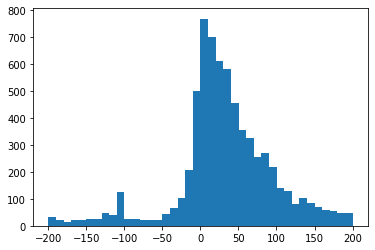

In [32]:
market_dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

In [33]:
new_data[new_data["direction"] == -1]["last_growth_rate"].describe()

count    11848.000000
mean        -1.807706
std        110.936584
min      -9723.169000
25%         -1.290000
50%         -0.003000
75%          0.552250
max        742.473000
Name: last_growth_rate, dtype: float64

(array([ 31.,  22.,  14.,  23.,  20.,  25.,  27.,  47.,  39., 125.,  24.,
         25.,  23.,  21.,  23.,  43.,  66., 102., 207., 502., 769., 700.,
        613., 582., 457., 355., 325., 255., 272., 218., 140., 128.,  82.,
        103.,  85.,  68.,  59.,  54.,  47.,  46.]),
 array([-1.99650350e+02, -1.89659091e+02, -1.79667832e+02, -1.69676573e+02,
        -1.59685315e+02, -1.49694056e+02, -1.39702797e+02, -1.29711538e+02,
        -1.19720280e+02, -1.09729021e+02, -9.97377622e+01, -8.97465035e+01,
        -7.97552448e+01, -6.97639860e+01, -5.97727273e+01, -4.97814685e+01,
        -3.97902098e+01, -2.97989510e+01, -1.98076923e+01, -9.81643357e+00,
         1.74825175e-01,  1.01660839e+01,  2.01573427e+01,  3.01486014e+01,
         4.01398601e+01,  5.01311189e+01,  6.01223776e+01,  7.01136364e+01,
         8.01048951e+01,  9.00961538e+01,  1.00087413e+02,  1.10078671e+02,
         1.20069930e+02,  1.30061189e+02,  1.40052448e+02,  1.50043706e+02,
         1.60034965e+02,  1.70026224e+02, 

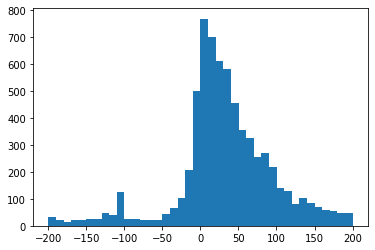

In [34]:
last_growth_rate = new_data[(new_data["direction"] == -1) 
                        & (new_data["last_growth_rate"] > -1)
                        & (new_data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(market_dcf_to_price, bins=40)

In [35]:
import numpy as np
import pandas as pd

In [36]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [37]:
data["price_change_perf"] = (data["current_price"] - data["last_price"]) * 100 / data["last_price"]

In [38]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = data[features].values
Y = (data.loc[:, 'price_change_perf'].values) 

In [39]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
# !pip3 install sklearn

In [41]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [42]:
# !pip3 install matplotlib

In [43]:
import matplotlib.pyplot as plt
# plt.hist(y_test, bins=40)

In [44]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]

In [45]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([1153.,  366.,  406.,  301.,  326.,  324.,  404.,  328.,  395.,
         323.,  466.,  444.,  483.,  557.,  576.,  634.,  721.,  699.,
         843.,  831., 2147.,  875.,  849.,  781.,  702.,  575.,  528.,
         425.,  383.,  327.,  306.,  193.,  244.,  199.,  157.,  168.,
         135.,  134.,  101.,   88.]),
 array([-1.00000000e+02, -9.50004629e+01, -9.00009258e+01, -8.50013888e+01,
        -8.00018517e+01, -7.50023146e+01, -7.00027775e+01, -6.50032404e+01,
        -6.00037034e+01, -5.50041663e+01, -5.00046292e+01, -4.50050921e+01,
        -4.00055550e+01, -3.50060180e+01, -3.00064809e+01, -2.50069438e+01,
        -2.00074067e+01, -1.50078696e+01, -1.00083326e+01, -5.00879548e+00,
        -9.25840137e-03,  4.99027868e+00,  9.98981576e+00,  1.49893528e+01,
         1.99888899e+01,  2.49884270e+01,  2.99879641e+01,  3.49875012e+01,
         3.99870382e+01,  4.49865753e+01,  4.99861124e+01,  5.49856495e+01,
         5.99851866e+01,  6.49847236e+01,  6.99842607e+01,  7.49837978

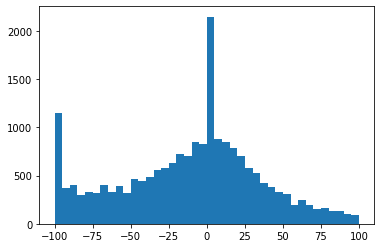

In [46]:
plt.hist(y_test, bins=40)

(array([3491., 1259., 1037., 1035.,  963.,  891., 1129., 1104., 1073.,
        1364., 1122., 1337., 1391., 1589., 1744., 1869., 2185., 2240.,
        2548., 2654., 6458., 2650., 2654., 2311., 2053., 1849., 1609.,
        1276., 1167.,  981.,  918.,  662.,  702.,  644.,  491.,  458.,
         444.,  374.,  312.,  253.]),
 array([-100.,  -95.,  -90.,  -85.,  -80.,  -75.,  -70.,  -65.,  -60.,
         -55.,  -50.,  -45.,  -40.,  -35.,  -30.,  -25.,  -20.,  -15.,
         -10.,   -5.,    0.,    5.,   10.,   15.,   20.,   25.,   30.,
          35.,   40.,   45.,   50.,   55.,   60.,   65.,   70.,   75.,
          80.,   85.,   90.,   95.,  100.]),
 <a list of 40 Patch objects>)

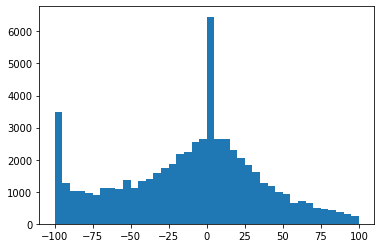

In [47]:
plt.hist(Y, bins=40)

In [48]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = model.predict(X_test)

(array([2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        9.000e+00, 1.700e+01, 1.700e+01, 2.500e+01, 3.600e+01, 4.700e+01,
        6.100e+01, 9.400e+01, 1.440e+02, 1.980e+02, 2.530e+02, 6.870e+02,
        6.240e+02, 9.180e+02, 8.030e+02, 7.895e+03, 7.150e+02, 8.290e+02,
        1.013e+03, 1.250e+03, 1.612e+03, 1.304e+03, 7.940e+02, 3.110e+02,
        1.350e+02, 5.100e+01, 2.400e+01, 1.100e+01, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-99.04044  , -95.16993  , -91.299416 , -87.4289   , -83.55838  ,
        -79.68787  , -75.81735  , -71.94684  , -68.076324 , -64.20581  ,
        -60.335293 , -56.46478  , -52.594265 , -48.723747 , -44.853233 ,
        -40.98272  , -37.112206 , -33.241688 , -29.371174 , -25.50066  ,
        -21.630144 , -17.759628 , -13.889114 , -10.0185995,  -6.148084 ,
         -2.2775693,   1.5929457,   5.4634604,   9.333976 ,  13.204491 ,
         17.075005 ,  20.94552  ,  24.816036 ,  28.68655  ,  32.

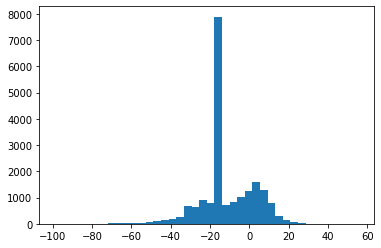

In [50]:
plt.hist(y_pred, bins=40)

In [57]:
# plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
# plt.plot(range(y_test.shape[0]), y_test, 'g-')
# plt.show()

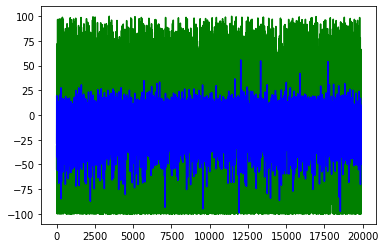

In [52]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [1]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

NameError: name 'accuracy_score' is not defined

In [54]:
accuracy = accuracy_score(y_test >= 20, y_pred >= 20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.47%


In [55]:
accuracy = accuracy_score(y_test < -30, y_pred < -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.37%


In [56]:
accuracy = accuracy_score(y_test < -40, y_pred < -40)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.42%


In [64]:
accuracy = accuracy_score(y_test < -35, y_pred < -35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.04%


In [60]:
new_data.to_csv("make_dcf_model_0609_82_accuracy.csv")

In [ ]:
!python -m nbconvert --to html DSF_Model_stats_model_5_years.ipynb

[NbConvertApp] Converting notebook DSF_Model_stats_model_5_years.ipynb to html
[NbConvertApp] Writing 575449 bytes to DSF_Model_stats_model_5_years.html
